In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8, 8)})

In [3]:
def scoring(clusterization, y_true, X):
    print(f'Number of clusters: {len(np.unique(y_true))} Estimated number of clusters: {len(np.unique(clusterization.labels_))}')
    print(f'Adjusted rand score: {metrics.adjusted_rand_score(y_true, clusterization.labels_)}')
    print(f'Adjusted mutual information: {metrics.adjusted_mutual_info_score(y_true, clusterization.labels_)}')
    print(f'Silhouette coefficient: {metrics.silhouette_score(X, clusterization.labels_)}')

In [4]:
from sklearn.datasets import make_blobs
X, y, centers = make_blobs(n_samples=50000,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1,
                  return_centers=True)

Те ж саме, що і у попередній раз, завдання було змінено, а саме n_samples=50000, а не n_samples=500000

<AxesSubplot:>

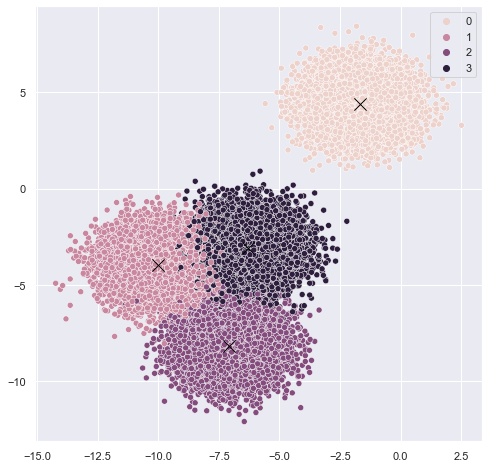

In [5]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=150, ec='black', marker='x')

In [6]:
from sklearn.cluster import MeanShift

clustering = MeanShift(n_jobs=-1)

In [19]:
%%time
clustering.fit(X)

Wall time: 5min 3s


MeanShift(n_jobs=-1)

<AxesSubplot:>

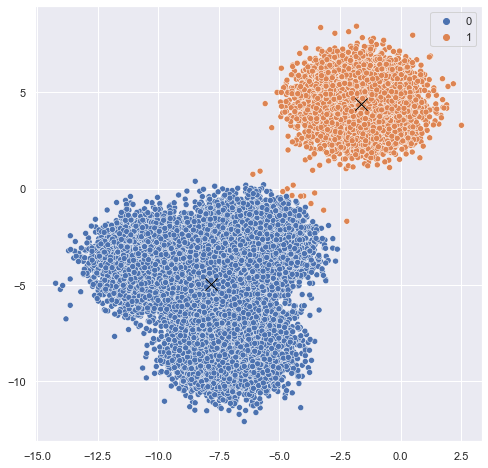

In [20]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [21]:
scoring(clustering, y, X)

Number of clusters: 4 Estimated number of clusters: 2
Adjusted rand score: 0.333178005819134
Adjusted mutual information: 0.5753813777494236
Silhouette coefficient: 0.6994033513940408


Модель не знайшла 3 різні кластери у скупчені, що дало нам не правильно розбиття

Спробуємо налаштувати параметр bandwidth:

In [22]:
from sklearn.cluster import estimate_bandwidth

estimate_bandwidth(X, n_jobs=-1)

4.691959591035538

bandwidth=2

In [23]:
clustering = MeanShift(bandwidth=2, n_jobs=-1)

In [24]:
%%time
clustering.fit(X)

Wall time: 2min 48s


MeanShift(bandwidth=2, n_jobs=-1)

<AxesSubplot:>

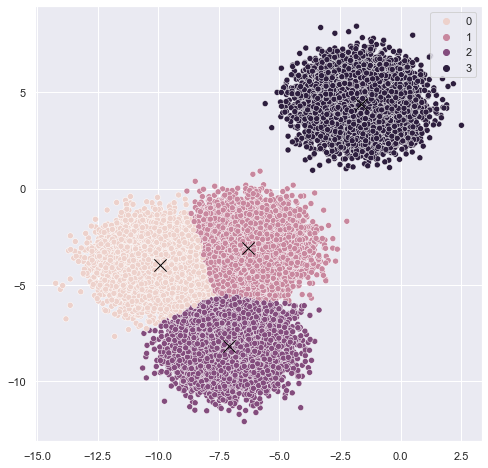

In [25]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [26]:
scoring(clustering, y, X)

Number of clusters: 4 Estimated number of clusters: 4
Adjusted rand score: 0.9513270354060911
Adjusted mutual information: 0.9324277291459312
Silhouette coefficient: 0.6354328089944988


Тут модель показала себе дуже гарно судячи як і по візуальному розбиттю, так і по метрикам, але спробуємо отримати результати ще краще (оскільки на око відрізнити дуже складно, то будемо судити по метрикам)

bandwidth=3

In [27]:
clustering = MeanShift(bandwidth=3, n_jobs=-1)

In [28]:
%%time
clustering.fit(X)

Wall time: 9min 15s


MeanShift(bandwidth=3, n_jobs=-1)

<AxesSubplot:>

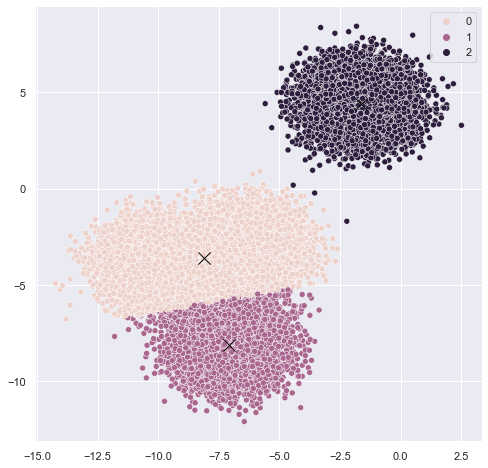

In [29]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [30]:
scoring(clustering, y, X)

Number of clusters: 4 Estimated number of clusters: 3
Adjusted rand score: 0.7021633132684552
Adjusted mutual information: 0.8285091074121936
Silhouette coefficient: 0.5903793129696125


bandwidth=3 спрацювало набагато гірше, неправильне розбиття (менша кількість кластерів) і тому значення метрик гірше

bandwidth=1.5

In [8]:
clustering = MeanShift(bandwidth=1.5, n_jobs=-1)

In [9]:
%%time
clustering.fit(X)

Wall time: 3min 26s


MeanShift(bandwidth=1.5, n_jobs=-1)

<AxesSubplot:>

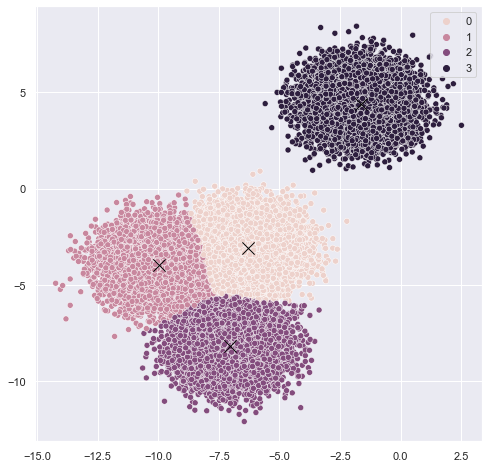

In [10]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [11]:
scoring(clustering, y, X)

Number of clusters: 4 Estimated number of clusters: 4
Adjusted rand score: 0.9511741510346639
Adjusted mutual information: 0.9322420468641779
Silhouette coefficient: 0.6354348406654698


In [12]:
clustering.cluster_centers_

array([[-6.28159873, -3.06556137],
       [-9.98007733, -3.96074853],
       [-7.05156724, -8.18415802],
       [-1.64935306,  4.38422843]])

In [13]:
centers

array([[-1.65955991,  4.40648987],
       [-9.9977125 , -3.95334855],
       [-7.06488218, -8.1532281 ],
       [-6.27479577, -3.08878546]])

Значення метрик залишилося +- таким самим, подальшого налаштування параметрів не буде показано, алгоритм працює дуже довго, це займає дуже багато місця, а значення метрик сильно кращими не стають <br>
Центри кластерів алгоритм знайшов доволі точно

Для дослідження чи є розбиття стабільним після зміни порядку об'єктів у множині об'єктів візьмемо значення bandwidth=1.5

In [14]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)

In [15]:
clustering = MeanShift(bandwidth=1.5, n_jobs=-1)

In [16]:
%%time
clustering.fit(X)

Wall time: 3min 35s


MeanShift(bandwidth=1.5, n_jobs=-1)

<AxesSubplot:>

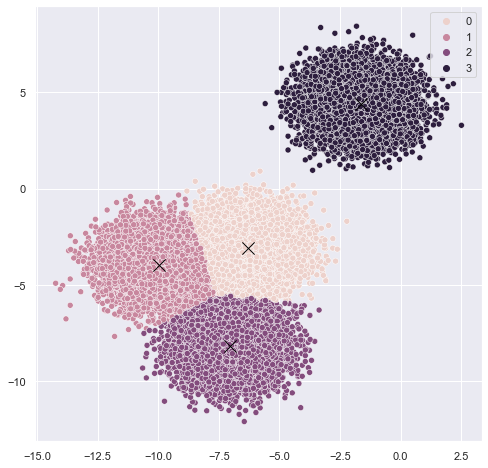

In [17]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [18]:
scoring(clustering, y, X)

Number of clusters: 4 Estimated number of clusters: 4
Adjusted rand score: 0.9511741510346639
Adjusted mutual information: 0.9322420468641779
Silhouette coefficient: 0.6354348406654698


In [19]:
clustering.cluster_centers_

array([[-6.28159873, -3.06556137],
       [-9.98007733, -3.96074853],
       [-7.05156724, -8.18415802],
       [-1.64935306,  4.38422843]])

In [20]:
centers

array([[-1.65955991,  4.40648987],
       [-9.9977125 , -3.95334855],
       [-7.06488218, -8.1532281 ],
       [-6.27479577, -3.08878546]])

Зміна порядку об'єктів ніяк не вплинула на результат -> алгоритм стабільний


Висновок: <br>
1. Алгоритм дуже повільний 
2. Він зміг дуже точно розділити скупчення трьох кластерів, алгоритм гарно працює на таких датасетах завдяки суті алгоритму яка зсуває центр кластеру дивлячись на середнє значення інших точок у регіоні